<a href="https://colab.research.google.com/github/CBelleLopez/CSE151A_Proj/blob/main/Neural_Network_Project_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can find a link to the dataset we are using [here](https://huggingface.co/datasets/julien-c/titanic-survival).

# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("hf://datasets/julien-c/titanic-survival/titanic.csv")
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## Data Preprocessing

In [ ]:
data = data.drop(columns = ['Name'])
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
data['Family Size']= data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard']
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


In [ ]:
data['Travel Alone']= np.where(data['Family Size'] >= 1, '1', '0')
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,0,0


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,0,0


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,0,0


In [ ]:
model2copy = copy.deepcopy(data)
model2copy

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000,0,0
883,1,1,0,19.0,0,0,30.0000,0,0
884,0,3,0,7.0,1,2,23.4500,3,1
885,1,1,1,26.0,0,0,30.0000,0,0


In [ ]:
data = data.drop(columns = ['Pclass'])
data.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,1,22.0,1,0,7.2500,1,1
1,1,0,38.0,1,0,71.2833,1,1
2,1,0,26.0,0,0,7.9250,0,0
3,1,0,35.0,1,0,53.1000,1,1
4,0,1,35.0,0,0,8.0500,0,0


In [ ]:
data.describe().round(2)

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size
count,887.00,887.00,887.00,887.00,887.00,887.00,887.00
mean,0.39,0.65,29.47,0.53,0.38,32.31,0.91
std,0.49,0.48,14.12,1.10,0.81,49.78,1.62
min,0.00,0.00,0.42,0.00,0.00,0.00,0.00
25%,0.00,0.00,20.25,0.00,0.00,7.92,0.00
50%,0.00,1.00,28.00,0.00,0.00,14.45,0.00
75%,1.00,1.00,38.00,1.00,0.00,31.14,1.00
max,1.00,1.00,80.00,8.00,6.00,512.33,10.00


<Axes: ylabel='Count'>

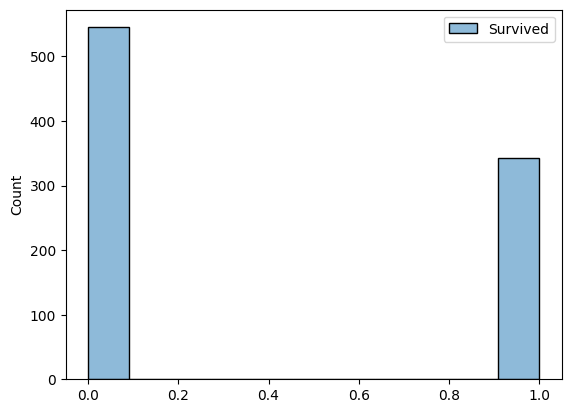

In [ ]:
sns.histplot(pd.DataFrame(data, columns = ['Survived']))

<Axes: ylabel='Count'>

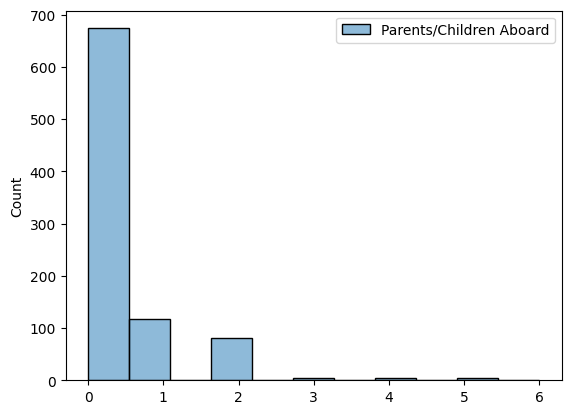

In [ ]:
sns.histplot(pd.DataFrame(data, columns = ['Parents/Children Aboard']))

<Axes: ylabel='Count'>

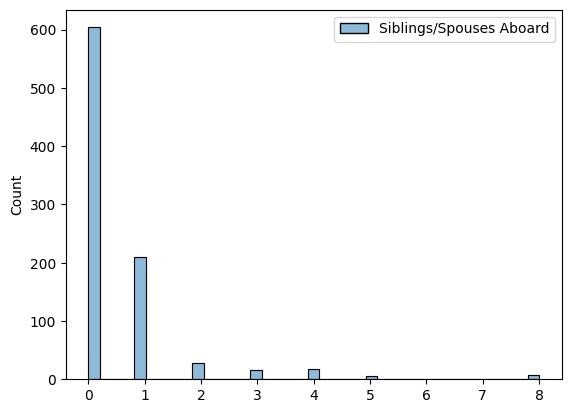

In [ ]:
sns.histplot(pd.DataFrame(data, columns = ['Siblings/Spouses Aboard']))

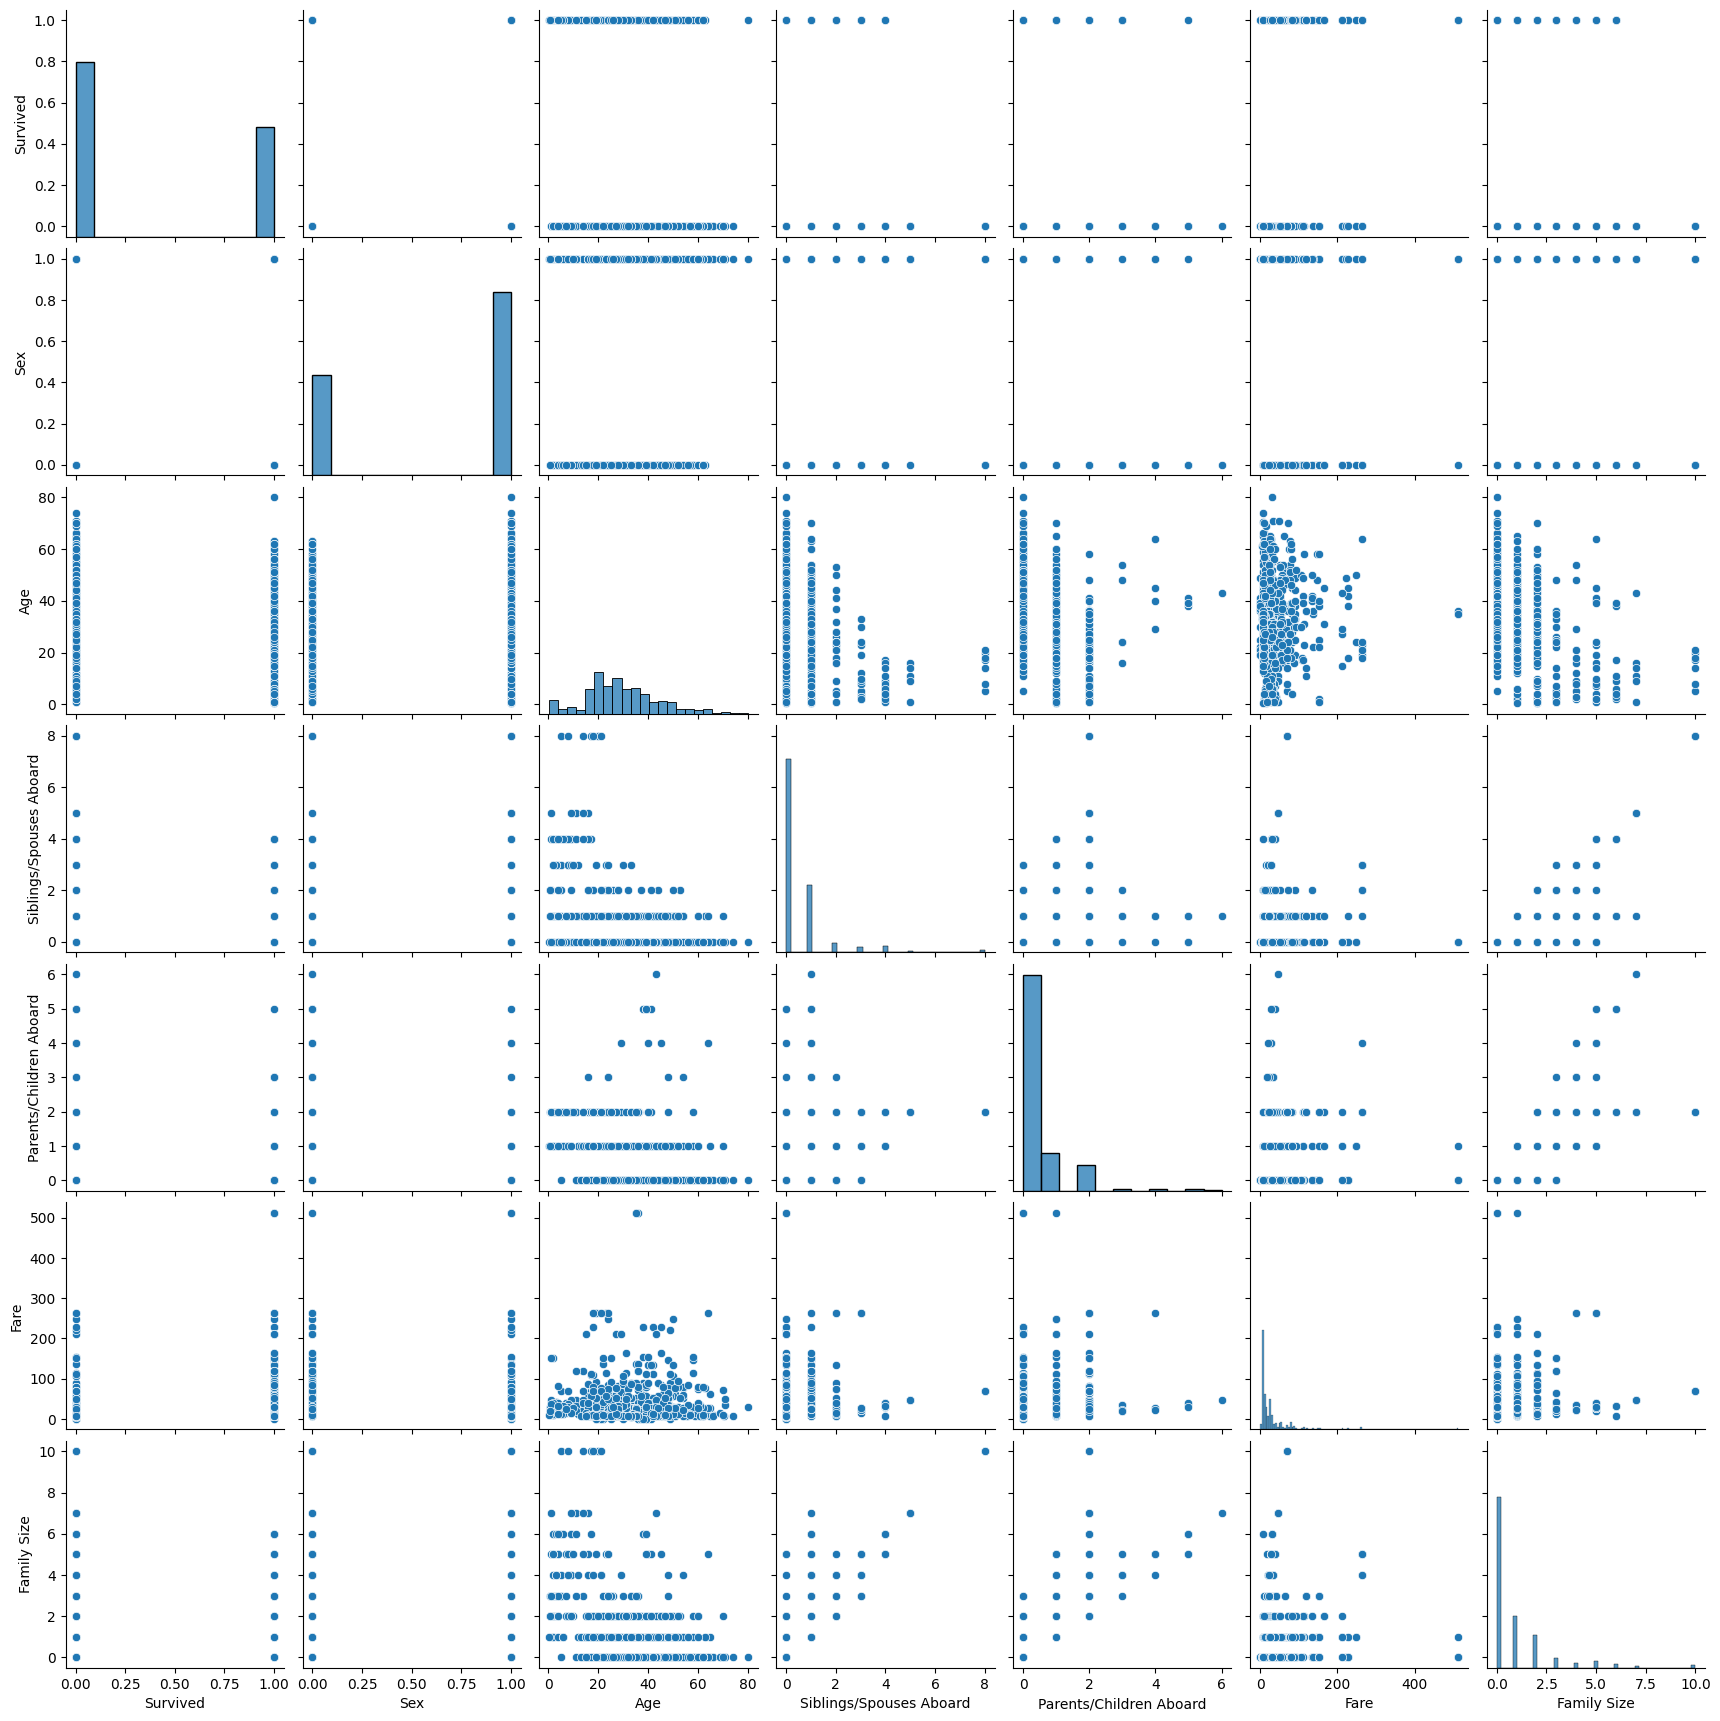

In [ ]:
sns.pairplot(data, diag_kind='auto')

In [ ]:
corr = data.corr()
corr

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
Survived,1.000000,-0.542152,-0.059665,-0.037082,0.080097,0.256179,0.014673,0.201058
Sex,-0.542152,1.000000,0.091875,-0.113249,-0.244337,-0.181137,-0.199509,-0.301764
Age,-0.059665,0.091875,1.000000,-0.297669,-0.193741,0.112329,-0.300297,-0.198951
Siblings/Spouses Aboard,-0.037082,-0.113249,-0.297669,1.000000,0.414244,0.158839,0.890595,0.583898
Parents/Children Aboard,0.080097,-0.244337,-0.193741,0.414244,1.000000,0.215470,0.782864,0.582825
Fare,0.256179,-0.181137,0.112329,0.158839,0.215470,1.000000,0.216250,0.270708
Family Size,0.014673,-0.199509,-0.300297,0.890595,0.782864,0.216250,1.000000,0.690384
Travel Alone,0.201058,-0.301764,-0.198951,0.583898,0.582825,0.270708,0.690384,1.000000


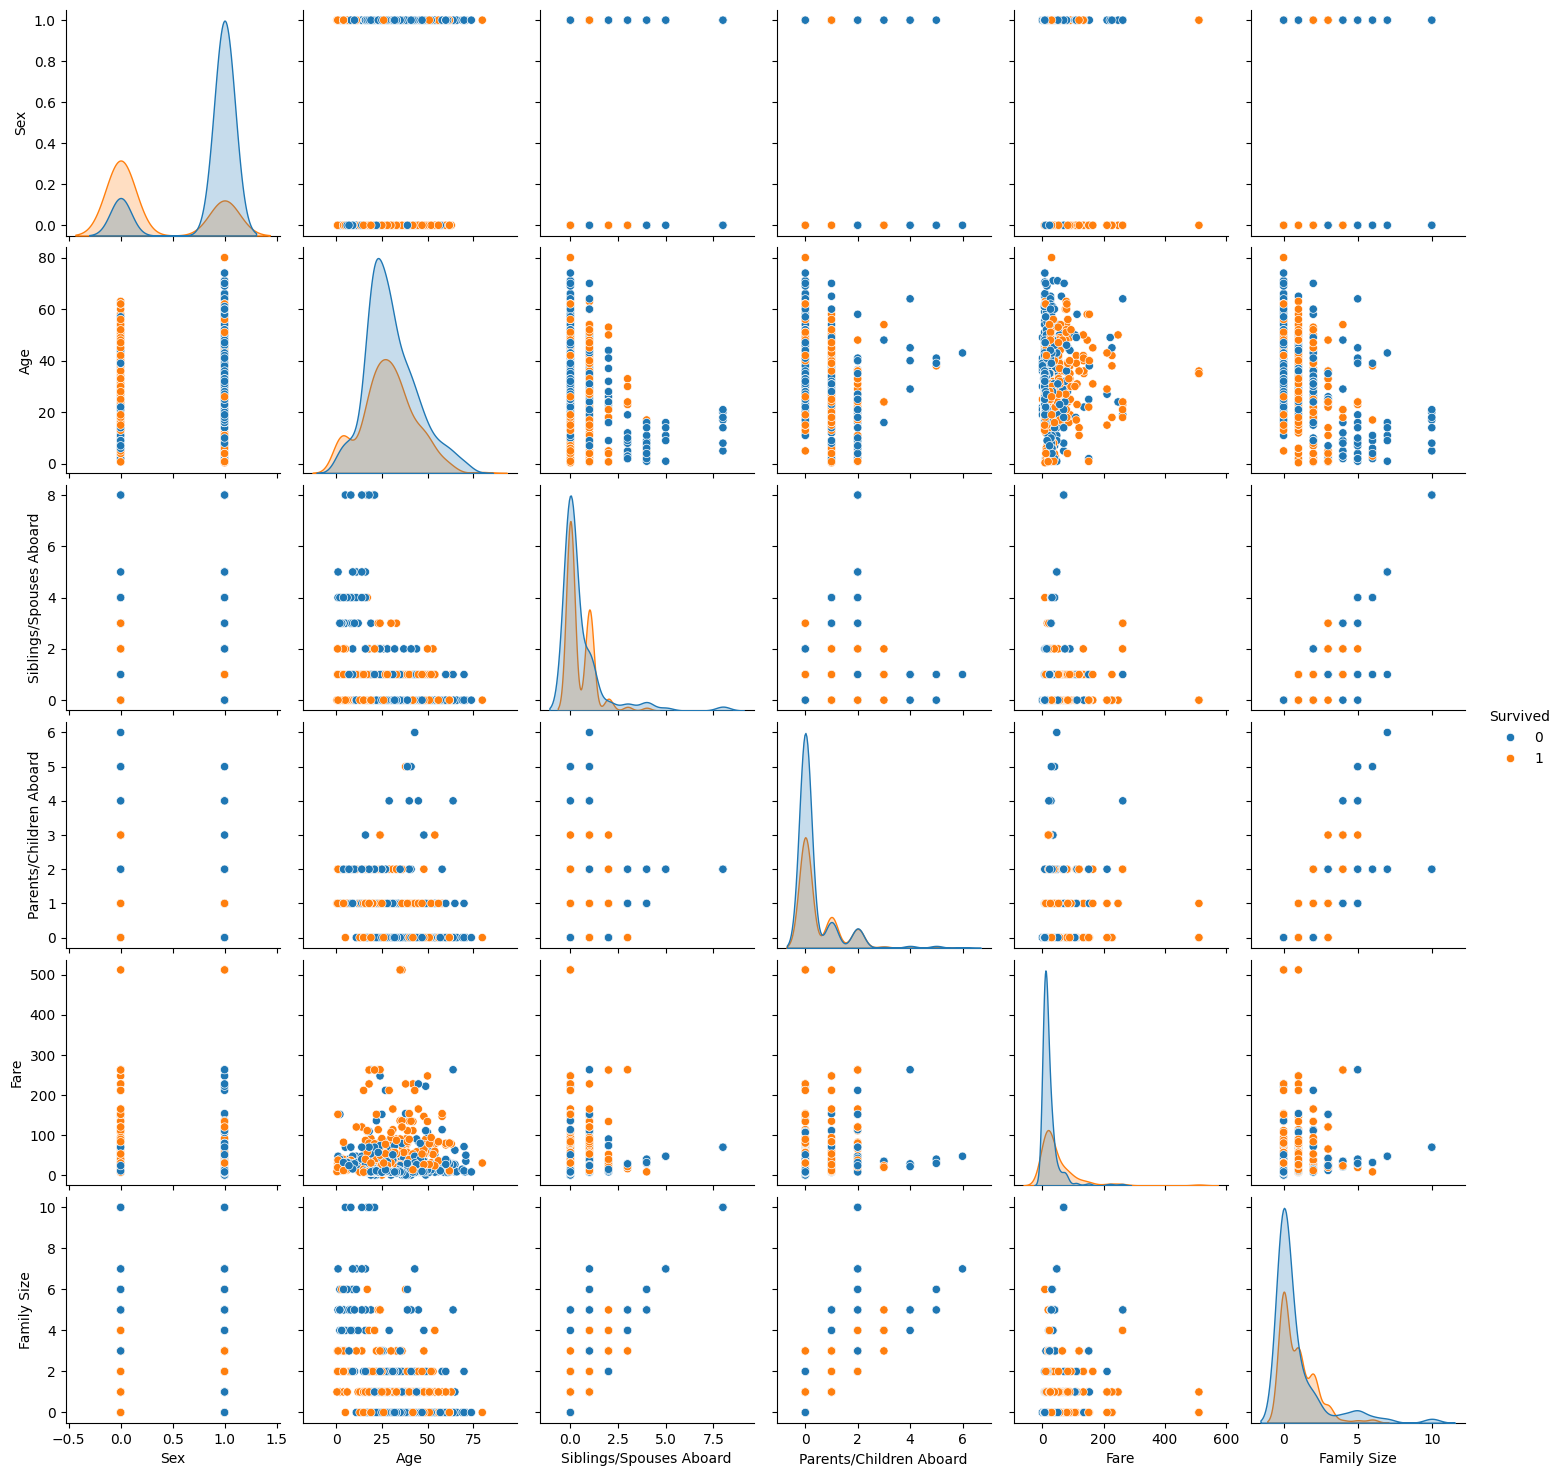

In [ ]:
sns.pairplot(data, hue = 'Survived', diag_kind='kde')

<Axes: >

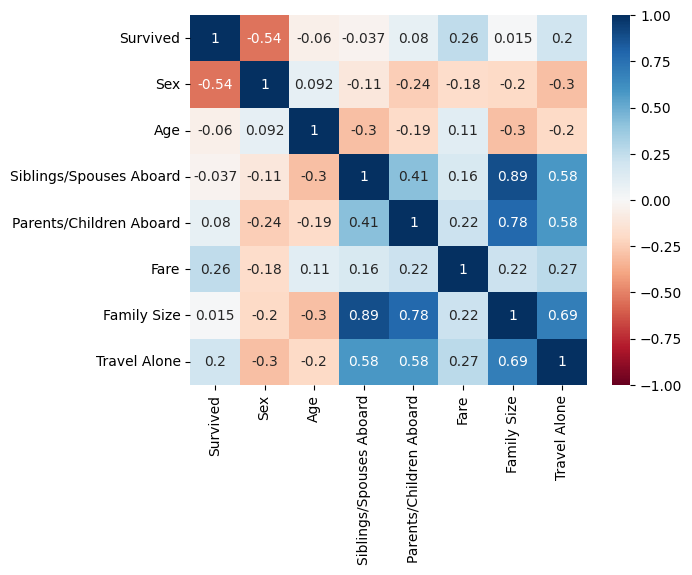

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Pre-Processing

1: Finish Major Preprocessing: Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).

2: Train your first model

3: Evaluate your model and compare training vs. test error

4: Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

5: Update your README.md to include your new work and updates you have all added. Make sure to upload all code and notebooks. Provide links in your README.md

6: Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

Please make sure preprocessing is complete and your first model has been trained. If you are doing supervised learning include example ground truth and predictions for train, validation and test.

In [ ]:
model2 = model2copy
model2

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,1,1
4,0,3,1,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000,0,0
883,1,1,0,19.0,0,0,30.0000,0,0
884,0,3,0,7.0,1,2,23.4500,3,1
885,1,1,1,26.0,0,0,30.0000,0,0


In [ ]:
scaler = MinMaxScaler()
X = model2.drop(['Pclass'], axis=1)
y = model2['Pclass']
y = pd.get_dummies(y, columns=['Pclass']).astype(int)
X = scaler.fit_transform(X)
y.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
model2 = Sequential()

model2.add(Dense(units = 128, activation = 'relu', input_dim = X.shape[1]))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
model2.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.001,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
history = model2.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 100, callbacks = [early_stopping], verbose = 0)

In [ ]:
history.history

{'loss': [0.9897363781929016,
  0.8918972611427307,
  0.7985644340515137,
  0.705413281917572,
  0.6372095942497253,
  0.6036362051963806,
  0.5658324360847473,
  0.5472350716590881,
  0.5297611355781555,
  0.5382760167121887,
  0.5305103659629822,
  0.5073589086532593,
  0.4955894649028778,
  0.5051738619804382,
  0.492496520280838,
  0.49191737174987793,
  0.48472753167152405,
  0.4916132092475891,
  0.4808673858642578,
  0.4751430153846741,
  0.48062512278556824,
  0.4715282618999481,
  0.47000277042388916,
  0.47279486060142517,
  0.4623323678970337,
  0.4580234885215759,
  0.45404770970344543,
  0.4753498435020447,
  0.45025917887687683,
  0.44807738065719604,
  0.44823911786079407,
  0.44681569933891296,
  0.44932132959365845,
  0.43756431341171265,
  0.44253861904144287,
  0.4448329508304596,
  0.4375212490558624,
  0.4331768751144409,
  0.43565693497657776,
  0.42894914746284485,
  0.4338472783565521,
  0.4474470913410187,
  0.4249933958053589,
  0.42603594064712524,
  0.429297

In [ ]:
yhat_test = model2.predict(X_test.astype(float))
yhat_test = (yhat_test > 0.5).astype(int)
yhat_test = np.argmax(yhat_test, axis=1)
y_test_ = np.argmax(y_test.values, axis=1)

yhat_train = model2.predict(X_train.astype(float))
yhat_train = (yhat_train > 0.5).astype(int)
yhat_train = np.argmax(yhat_train, axis=1)
y_train_ = np.argmax(y_train.values, axis=1)

23/23 [==============================] - 0s 3ms/step


In [ ]:
print('Training Report:')
print(classification_report(y_train_, yhat_train))

print('Testing Report:')
print(classification_report(y_test_, yhat_test))

Training Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       176
           1       0.86      0.56      0.68       149
           2       0.87      0.96      0.91       384

    accuracy                           0.87       709
   macro avg       0.87      0.83      0.84       709
weighted avg       0.87      0.87      0.87       709

Testing Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.82      0.51      0.63        35
           2       0.88      0.93      0.91       103

    accuracy                           0.85       178
   macro avg       0.84      0.80      0.80       178
weighted avg       0.85      0.85      0.84       178



Test Confusion Matrix:


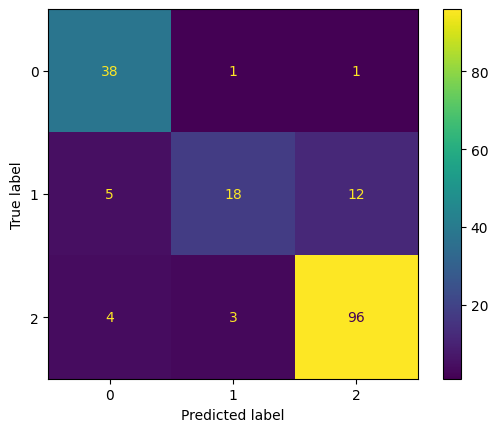

In [ ]:
print('Test Confusion Matrix:')
ConfusionMatrixDisplay.from_predictions(y_test_, yhat_test)

Train Confusion Matrix:


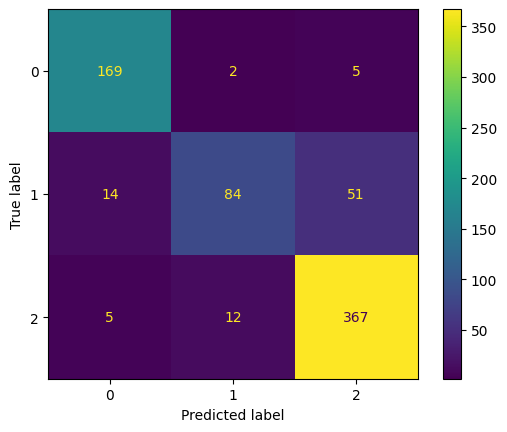

In [ ]:
print('Train Confusion Matrix:')
ConfusionMatrixDisplay.from_predictions(y_train_, yhat_train)